In [2]:
#Importing the required python libraries
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [4]:
#Reading and importing the training and testing datasets
train=pd.read_csv('train.csv')
train_x=train.iloc[:,0].values
train_y=train.iloc[:,1].values
test=pd.read_csv('test.csv')
test_x=test.iloc[:,0].values
test_y=test.iloc[:,1].values

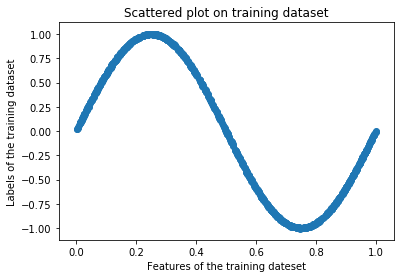

In [6]:
#plotting the scattered points of training dataset and saving it
plt.scatter(train_x,train_y)
plt.xlabel('Features of the training dateset')
plt.ylabel('Labels of the training dataset')
plt.title('Scattered plot on training dataset')
plt.savefig('Scattered plot on training dateset.png')

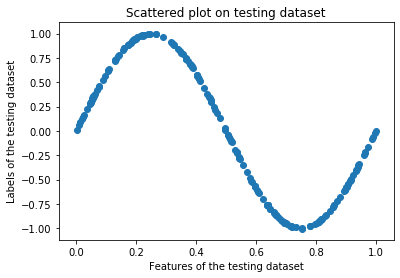

In [7]:
#plotting the scattered points of testing dataset and saving it
plt.scatter(test_x,test_y)
plt.xlabel('Features of the testing dataset')
plt.ylabel('Labels of the testing dataset')
plt.title('Scattered plot on testing dataset')
plt.savefig('Scattered plot on testing dateset.png')

In [8]:
def x_polynomial(n,x):
    x_nom=[]
    for i in range(len(x)):
        p=[]
        for j in range(n+1):
            p+=[x[i]**j]
        x_nom.append(p)
    return np.array(x_nom)

In [9]:
def hypothesis(theta,x):
    return np.dot(x,theta)

In [10]:
def min_squ_error(theta,x,y):
    ans=0
    ans+=hypothesis(theta,x)
    error=np.mean((ans-y)**2)
    error/=2
    return error

In [11]:
def gradient_descent(theta,x,y):
    ans=0
    ans+=hypothesis(theta,x)
    ans-=y
    ans= x.transpose()*ans
    return np.mean(ans,axis=1)

In [12]:
def regression(theta,x,y,alpha,cutoff=1e-6):
    error1=0
    while True:
        next_error=min_squ_error(theta,x,y)
        if abs(next_error-error1)<=cutoff:
            break
        error1=next_error
        gradient=alpha*gradient_descent(theta,x,y)
        theta=np.subtract(theta, gradient)
    return theta

[ 0.88764017 -1.80432058]


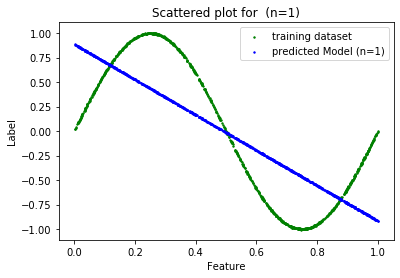

[ 0.78222516 -1.11667137 -0.69741183]


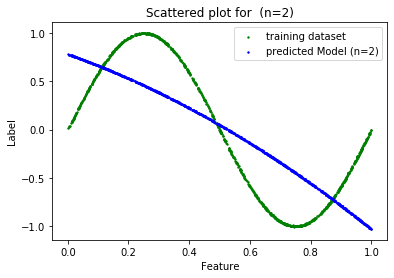

[ 1.02233201 -2.13135719 -0.81486597  1.19397169]


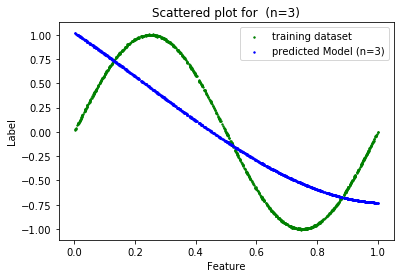

[ 0.73677044  1.1264521  -6.22611832 -1.33034032  5.47981212]


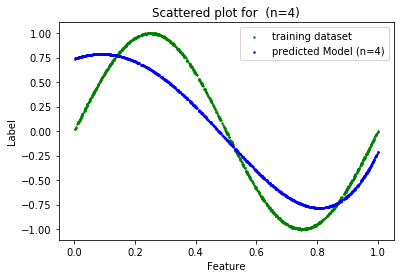

[ 0.65646077  1.58277376 -5.51295417 -2.79207877  1.81778076  4.29445798]


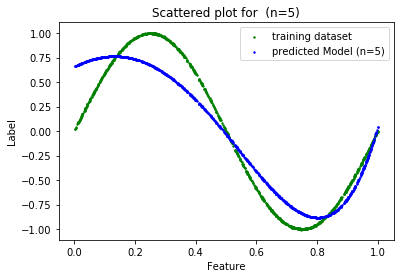

[ 0.68790711  0.89344013 -2.97666736 -3.82885689 -0.83512746  3.27042841
  3.01192932]


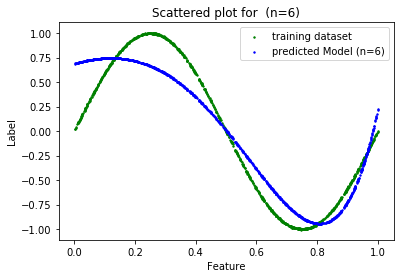

[ 0.68750324  0.97777206 -3.84149104 -1.68037318 -1.08559292  1.26867413
  1.40841264  2.58199828]


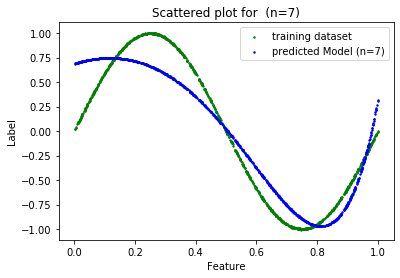

[ 0.70501455  0.75162322 -3.08377359 -3.09336136  0.93781543  0.61700889
  0.62210895  0.77966753  2.14248841]


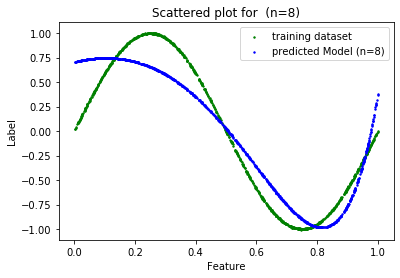

[ 0.74916528  0.27681406 -2.48496331 -1.69043972 -1.159504    1.40580899
 -0.19389159  0.28376469  1.7537071   1.52876062]


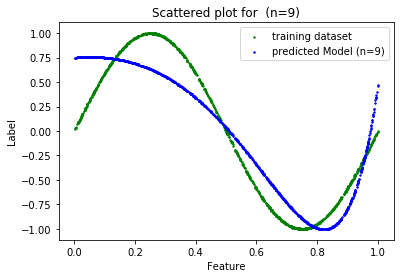

[0.09535783015289388, 0.09708261447326567, 0.08882580472654379, 0.03880926730323888, 0.027044968911260035, 0.02739189380984831, 0.02845863691414734, 0.03024312362444281, 0.03514578849068624]


<Figure size 432x288 with 0 Axes>

In [30]:
train_error=[]
test_error=[]
for i in [1,2,3,4,5,6,7,8,9]:
    x1_train=x_polynomial(i,train_x)
    x1_test=x_polynomial(i,test_x)
    coef=np.random.randn(i+1)
    theta=regression(coef,x1_train,train_y,0.05)
    print(theta)
    train_error.append(np.mean((np.dot(x1_train, theta) - train_y)**2)/2)
    test_error.append(np.mean((np.dot(x1_test, theta) - test_y)**2)/2)
    plt.scatter(train_x,train_y,color='green',marker='o',label='training dataset',s=2)
    plt.scatter(train_x,np.dot(x1_train, theta),color='blue',marker='o',label='predicted Model (n='+str(i)+')',s=2)
    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.legend()
    plt.title('Scattered plot for  (n='+str(i)+')')
    plt.savefig('Scattered plot on predicted values for Model (n='+str(i)+') .png')
    plt.show()
    plt.clf()
print(test_error)

In [35]:
print(test_error)
print(train_error)

[0.09535783015289388, 0.09708261447326567, 0.08882580472654379, 0.03880926730323888, 0.027044968911260035, 0.02739189380984831, 0.02845863691414734, 0.03024312362444281, 0.03514578849068624]
[0.09982311169430545, 0.10286136540817495, 0.09025159625142953, 0.03792126646739805, 0.02582043777978501, 0.025851690266312892, 0.026836151278502016, 0.02849311455061744, 0.03310589215402652]


In [37]:
from numpy import asarray
from numpy import savetxt
savetxt('test_error for Model 1 to 9.csv', test_error, delimiter=',')
savetxt('train_error for Model 1 to 9.csv', train_error, delimiter=',')